# Time Series

`univariate` - one variable over a time

`mulitvariate` - many values over a time

trend, seasonality, atocorrelation, noise

`non stationary timeseries` - time series with no vizible seazonality. For non stationary data its better to train on smaller (shorter period)

## Vizualisation

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Trend

In [13]:
def trend_f(time,slope):
    trend=time*slope
    return trend

In [14]:
slope=0.1
time=np.arange(365*4+1)
trend=trend_f(time,slope)

Text(0, 0.5, 'value')

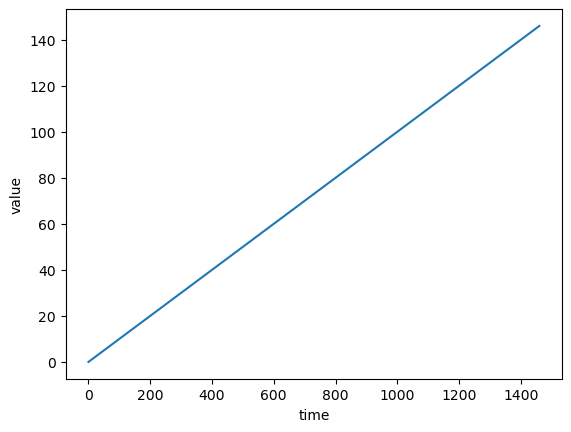

In [4]:
plt.plot(time, trend)
plt.xlabel('time')
plt.ylabel('value')

### Seasonality

In [11]:
def season_f(time,period):
    season=(time%period)/period
    return season

def seasonality_f(sason_time,amplitude):
    data_pattern = np.where(season_time < 0.4,np.cos(season_time * 2 * np.pi),1 / np.exp(3 * season_time))
    seasonality=amplitude*data_pattern
    return seasonality
    

In [12]:
period=365
amplitude=40
time=np.arange(365*4+1)

season_time=season_f(time,period)
seasonality=seasonality_f(season_time,amplitude)

Text(0, 0.5, 'value')

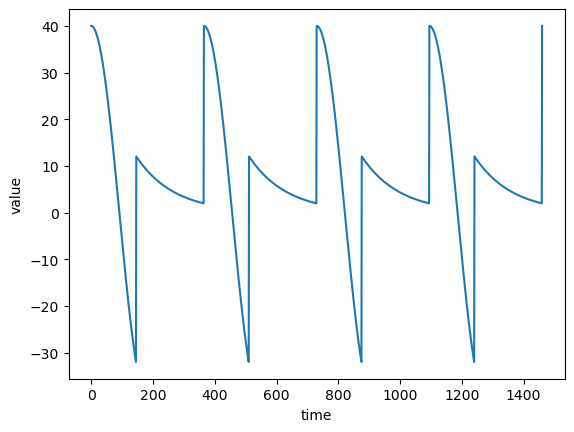

In [7]:
plt.plot(time, seasonality)
plt.xlabel('time')
plt.ylabel('value')

### Trend + Seasonality

In [9]:
slope=0.1
period=365
amplitude=40
time=np.arange(365*4+1)

trend=trend_f(time,slope)
season_time=season_f(time,period)
seasonality=seasonality_f(season_time,amplitude)

series=seasonality+trend

Text(0, 0.5, 'value')

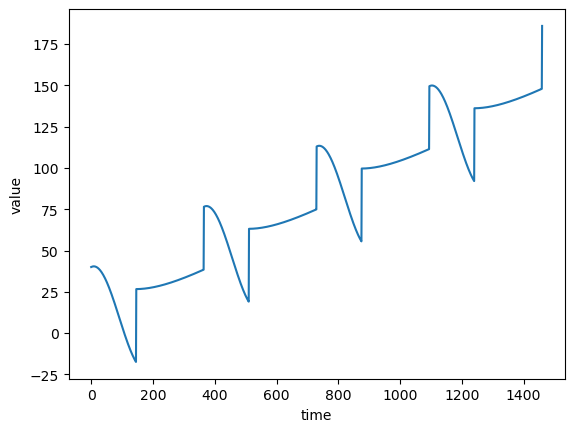

In [10]:
plt.plot(time, series)
plt.xlabel('time')
plt.ylabel('value')

### Noise

In [16]:
def noise_f(time,noise_level):
    rnd = np.random.RandomState(42)
    noise = rnd.randn(len(time))*noise_level
    return noise

In [17]:
noise_level=5
time=np.arange(365*4+1)

noise = noise_f(time,noise_level)

Text(0, 0.5, 'value')

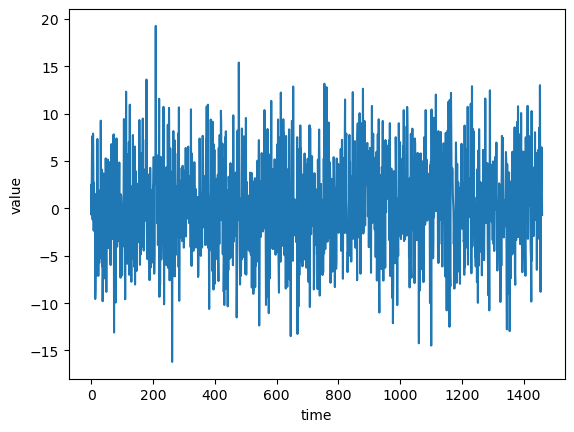

In [18]:
plt.plot(time, noise)
plt.xlabel('time')
plt.ylabel('value')

### Trend+Seasonality+Noise

In [19]:
slope=0.1
period=365
amplitude=40
noise_level=5
time=np.arange(365*4+1)

trend=trend_f(time,slope)
season_time=season_f(time,period)
seasonality=seasonality_f(season_time,amplitude)
noise = noise_f(time,noise_level)

Text(0, 0.5, 'value')

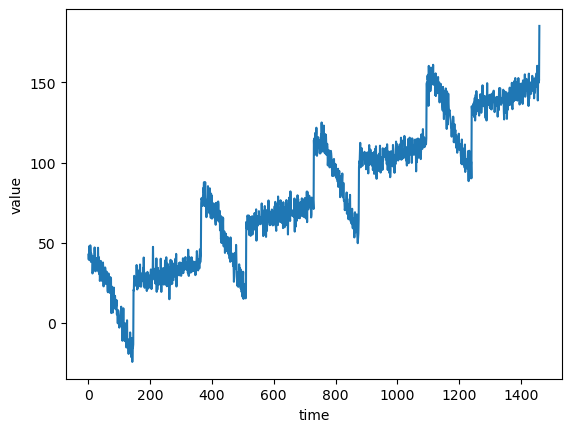

In [20]:
plt.plot(time, noise+seasonality+trend)
plt.xlabel('time')
plt.ylabel('value')

### Autocorrelation

In [22]:
def autocorr_f(time,phi1,phi2,amplitude):
    rnd = np.random.RandomState(42)
    autocorr = rnd.randn(len(time)+50)
    autocorr[:50]=100
    for step in range(50, len(time) + 50):
            autocorr[step] += phi1 * autocorr[step - 50]
            autocorr[step] += phi2 * autocorr[step - 33]
    autocorr = autocorr[50:] * amplitude
    return autocorr

In [23]:
amplitude=10
phi1=0.5
phi2=-0.1
time=np.arange(365*4+1)

ar=autocorr_f(time,phi1,phi2,amplitude)

Text(0, 0.5, 'value')

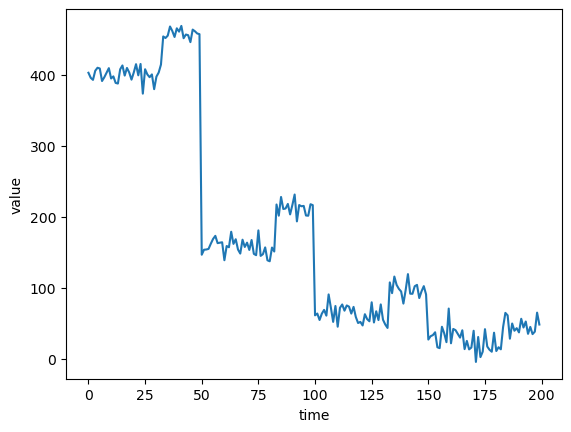

In [24]:
plt.plot(time[:200], ar[:200])
plt.xlabel('time')
plt.ylabel('value')

In [26]:
def autocorr_f2(time,phi1,amplitude):
    rnd = np.random.RandomState(42)
    autocorr = rnd.randn(len(time)+1)
    for step in range(1, len(time) + 1):
            autocorr[step] += phi1 * autocorr[step - 1]
    autocorr = autocorr[1:] * amplitude
    return autocorr

In [28]:
amplitude=10
phi1=0.8
time=np.arange(365*4+1)

ar=autocorr_f2(time,phi1,amplitude)

Text(0, 0.5, 'value')

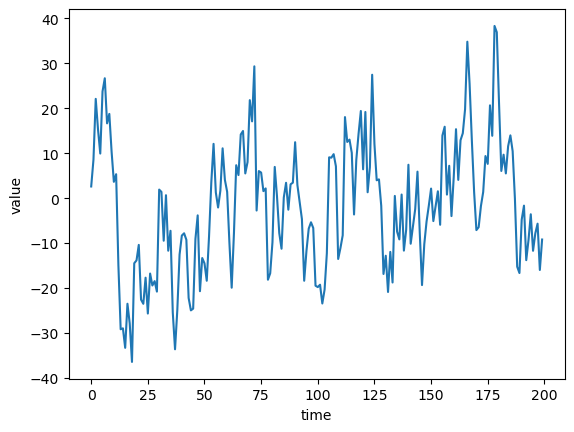

In [29]:
plt.plot(time[:200], ar[:200])
plt.xlabel('time')
plt.ylabel('value')

### Impulse

In [31]:
def impulse_f(time,impulses,amplitude):
    rnd = np.random.RandomState(42)
    impulses = np.zeros(len(time))
    impulse_indices=rnd.randint(len(time), size=num_impulses)
    for index in impulse_indices:
        impulses[index] += rnd.rand() * amplitude
    return impulses
    

In [ ]:
impulses=10
amplitude=2
time=np.arange(365*4+1)

impulses=impulse_f(time,impulses,amplitude)

Text(0, 0.5, 'value')

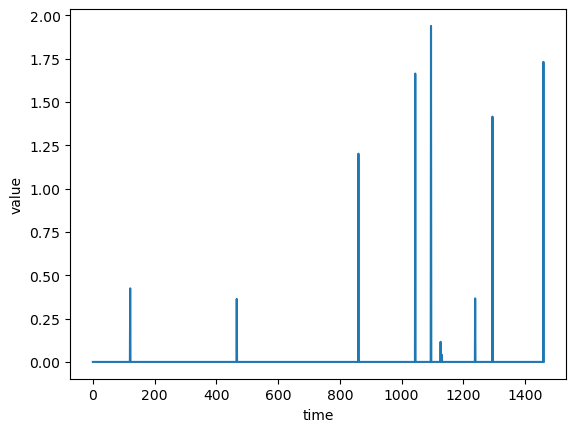

In [32]:
plt.plot(time, impulses)
plt.xlabel('time')
plt.ylabel('value')

### Autocorreltion Impulse

In [35]:
def autocorr_impulse_f(source,phis):
    autocorr = source.copy()
    for step, value in enumerate(source):
        for lag, phi in phis.items():
            if step - lag > 0:
              autocorr[step] += phi * autocorr[step - lag]
    return autocorr

In [36]:
impulses=10
amplitude=2
phis={1: 0.99}
time=np.arange(365*4+1)

impulses=impulse_f(time,impulses,amplitude)
arim=autocorr_impulse_f(impulses,phis)

Text(0, 0.5, 'value')

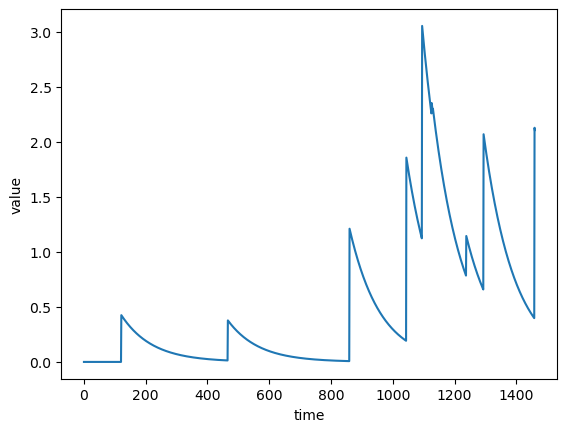

In [37]:
plt.plot(time, arim)
plt.xlabel('time')
plt.ylabel('value')

In [38]:
impulses=10
amplitude=2
phis={1: 0.70, 50: 0.2}
time=np.arange(365*4+1)

impulses=impulse_f(time,impulses,amplitude)
arim=autocorr_impulse_f(impulses,phis)

Text(0, 0.5, 'value')

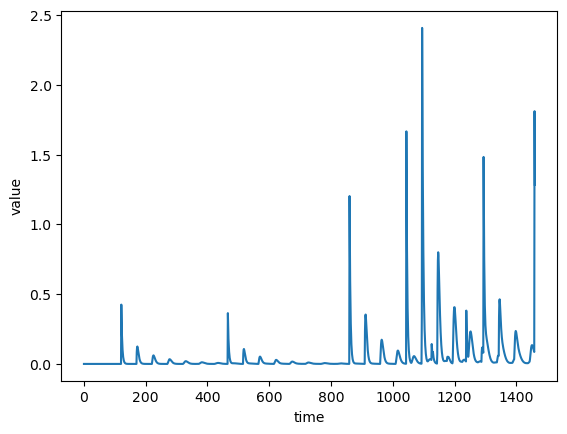

In [39]:
plt.plot(time, arim)
plt.xlabel('time')
plt.ylabel('value')

### all

Text(0, 0.5, 'value')

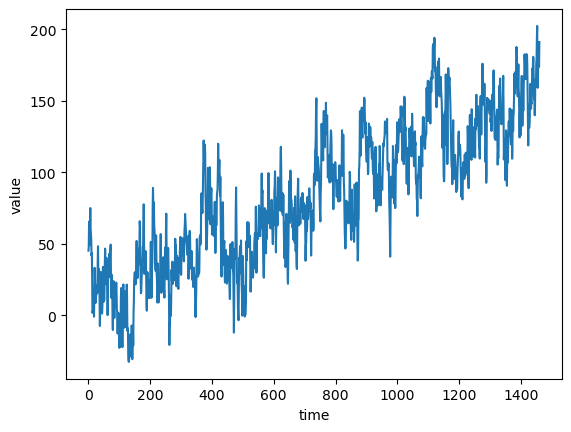

In [40]:
plt.plot(time, ar+seasonality+trend+noise)
plt.xlabel('time')
plt.ylabel('value')

---

## Forecasting

In [50]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#### Data

In [41]:
slope=0.1
period=365
amplitude=40
noise_level=5
time=np.arange(365*4+1)

trend=trend_f(time,slope)
season_time=season_f(time,period)
seasonality=seasonality_f(season_time,amplitude)
noise = noise_f(time,noise_level)

series=noise+trend+seasonality

Text(0, 0.5, 'value')

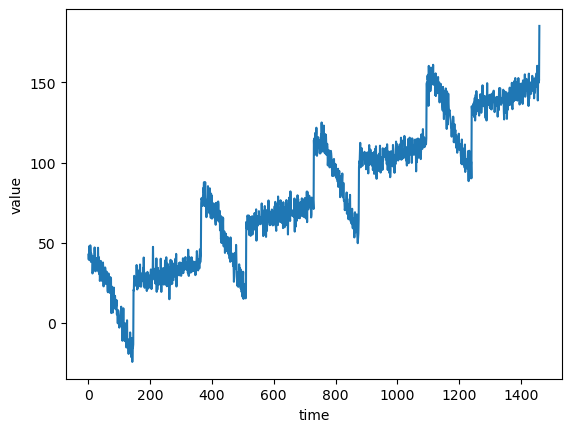

In [42]:
plt.plot(time, series)
plt.xlabel('time')
plt.ylabel('value')

In [46]:
split_time=1000
time_train = time[:split_time]
time_val = time[split_time:]
x_train = series[:split_time]
x_val = series[split_time:]

#### Naive Forecast

Assume that the next value will be the same as the prewious one

In [47]:
naive_forecast=series[split_time-1:-1]

print(f'ground truth at time step {100}: {x_val[100]}')
print(f'prediction at time step {100 + 1}: {naive_forecast[100 + 1]}')

ground truth at time step 100: 154.84197754668259
prediction at time step 101: 154.84197754668259


Text(0, 0.5, 'value')

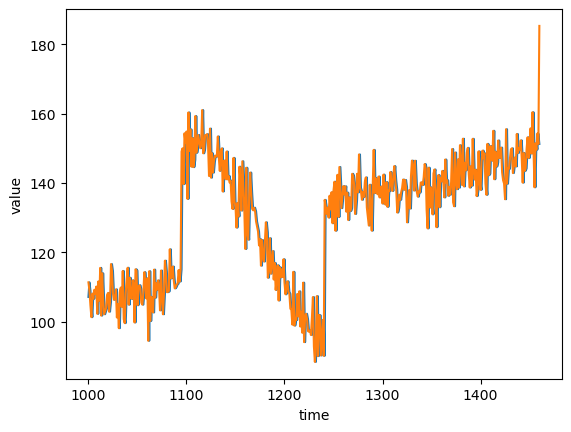

In [48]:
plt.plot(time_val, naive_forecast)
plt.plot(time_val, x_val)
plt.xlabel('time')
plt.ylabel('value')

Metrics

In [51]:
print(tf.keras.metrics.mean_squared_error(x_val, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_val, naive_forecast).numpy())

61.84198832928214
5.936744608559428


#### Moving Average

In [52]:
def moving_avg_f(series,window_size):
    moving_avg=[]
    for time in range(len(series) - window_size):
        moving_avg.append(series[time:time + window_size].mean())
    return np.array(moving_avg)

In [53]:
window_size=30

moving_avg = moving_avg_f(series,window_size)

Text(0, 0.5, 'value')

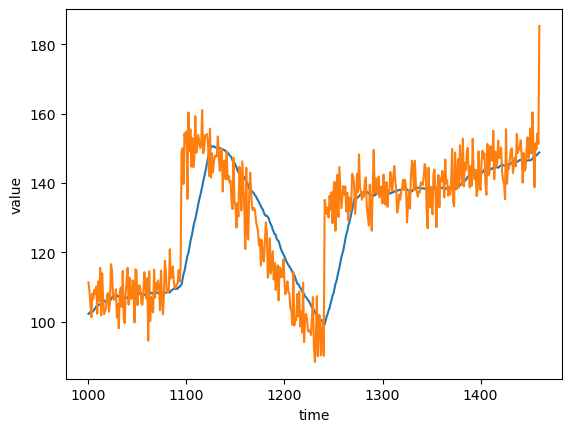

In [54]:
plt.plot(time_val, moving_avg[split_time-30:])
plt.plot(time_val, x_val)
plt.xlabel('time')
plt.ylabel('value')

In [55]:
print(tf.keras.metrics.mean_squared_error(x_val, moving_avg[split_time-30:]).numpy())
print(tf.keras.metrics.mean_absolute_error(x_val, moving_avg[split_time-30:]).numpy())

108.61303904269748
7.170360100146125


#### Differencing

In [56]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

Text(0, 0.5, 'value')

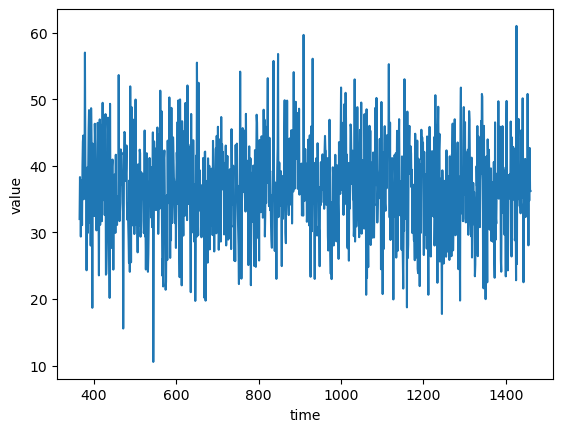

In [57]:
plt.plot(diff_time, diff_series)
plt.xlabel('time')
plt.ylabel('value')

In [58]:
window_size=30

diff_moving_avg = moving_avg_f(diff_series,window_size)

Text(0, 0.5, 'value')

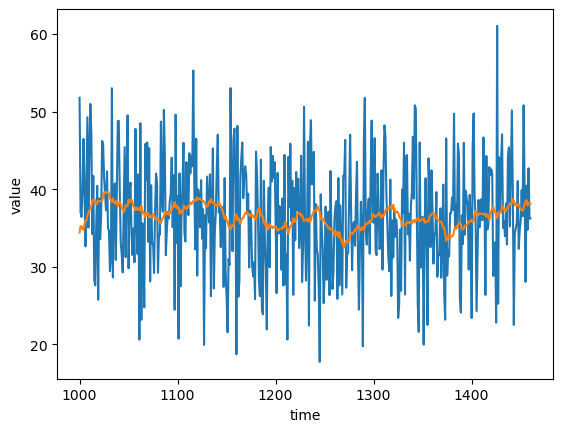

In [63]:
plt.plot(diff_time[split_time-365:], diff_series[split_time-365:])
plt.plot(diff_time[split_time-365:], diff_moving_avg[split_time-365-30:])
plt.xlabel('time')
plt.ylabel('value')

Text(0, 0.5, 'value')

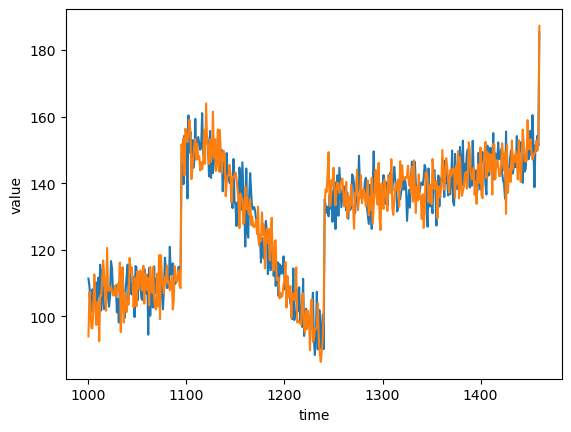

In [62]:
plt.plot(time_val, x_val)
plt.plot(time_val, series[split_time - 365:-365]+diff_moving_avg[split_time-365-30:])
plt.xlabel('time')
plt.ylabel('value')

In [64]:
diff_moving_avg_plus_past=series[split_time - 365:-365]+diff_moving_avg[split_time-365-30:]
print(tf.keras.metrics.mean_squared_error(x_val, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_val, diff_moving_avg_plus_past).numpy())

53.76458283759629
5.903241593813162


#### Smooth

In [67]:
diff_moving_avg_plus_smooth_past=moving_avg_f(series[split_time - 370:-359],11)+diff_moving_avg[split_time-365-30:]

Text(0, 0.5, 'value')

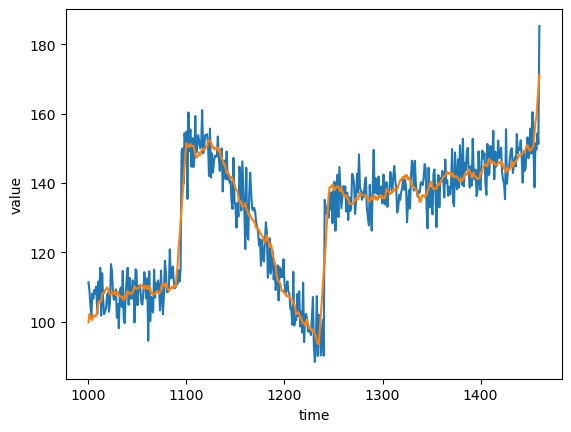

In [68]:
plt.plot(time_val, x_val)
plt.plot(time_val, diff_moving_avg_plus_smooth_past)
plt.xlabel('time')
plt.ylabel('value')

In [69]:
print(tf.keras.metrics.mean_squared_error(x_val, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_val, diff_moving_avg_plus_smooth_past).numpy())

34.31572236237806
4.605328989024403
